This project was part of the Kaggle competition regarding the Titanic. I analyse the data using Pandas, Matplotlib and Seaborn.

## Part 1 - Importing data and project overview

In [1]:
import pandas as pd #Importing relevant libraries
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv('train.csv') #Reading in the data
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info(memory_usage='deep') #Looking at number of columns and the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 315.0 KB


In [4]:
titanic_df.isna().sum() # Looking at how many null values there are.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Who were the passengers aboard the Titanic? (Age, class, gender... etc)

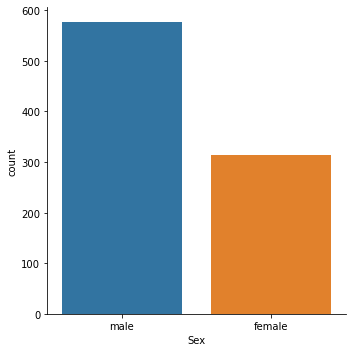

In [8]:
sns.catplot(x='Sex',data=titanic_df,kind='count') 
# I use the Seaborn library here to plot the count of male and female from out dataframe.

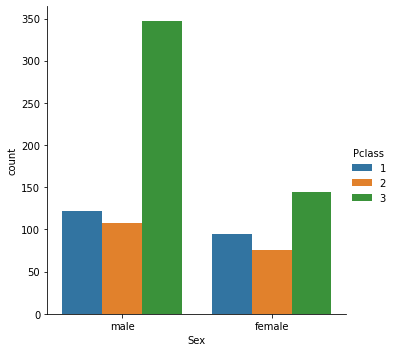

In [12]:
sns.catplot(x='Sex',data=titanic_df,hue='Pclass',kind='count')
# I use the Seaborn library to plot and count the sex, along with their class.
# Hue allows us to colour encode the class data and add it to the plot.

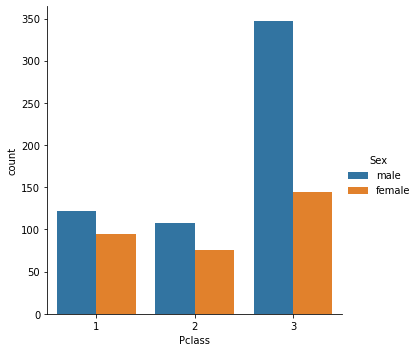

In [13]:
sns.catplot(x='Pclass',data=titanic_df,hue='Sex',kind='count')
# I am using Seaborn again to plot the count of the class of passengers.
# I then set the hue to sex to show the count of each gender per class of ticket purchased.

What deck were the passengers on and how does this relate to their class?

In [14]:
# I have created a function below to turn any male or female below the age of 16 to a child.
def male_female_child(passenger): #Defining our function
    age,sex = passenger #Object takes in age and sex as an arguement
    if age < 16:
        return 'child'
    else:
        return sex
#If the male or female is below 16 years of age, they will be classified as a child.

In [15]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)
# I create a new column called person which will indicate male, female or child from the function above
# The new column applies the function to the age and sex columns of the dataframe.

In [16]:
titanic_df[0:10] #Checking if the column has been created

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


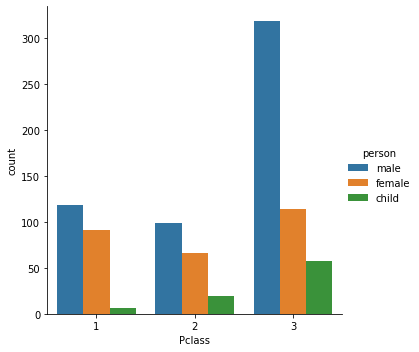

In [14]:
sns.catplot(x='Pclass',data=titanic_df,hue='person',kind='count')
#seperating classes by male female and child

Create a histogram of the ages aboard the Titanic.

<AxesSubplot:>

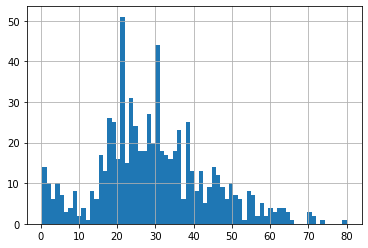

In [17]:
titanic_df['Age'].hist(bins=70) # I have created a histogram of the ages.

# Part 2 - What were the ages of the passangers and where did they come from?

In [18]:
titanic_df['Age'].mean() #Finding the mean age of the passenger.

29.69911764705882

In [19]:
titanic_df['person'].value_counts() #Counting the number of passengers

male      537
female    271
child      83
Name: person, dtype: int64

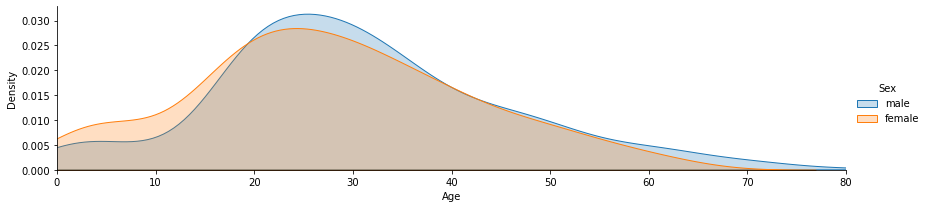

In [22]:
fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4) #Set hue = sex, again for colour encoding
fig.map(sns.kdeplot,'Age',shade=True) #KDE plot - similar to histogram, but fills in the area below the curve
oldest = titanic_df['Age'].max() #Determining the oldest passenger to set this as our xlimit below
fig.set(xlim=(0,oldest))
fig.add_legend()
#Facetgrid is very useful from the Seaborn library. This allows the user to plot multiple pieces
# of data on the same graph.

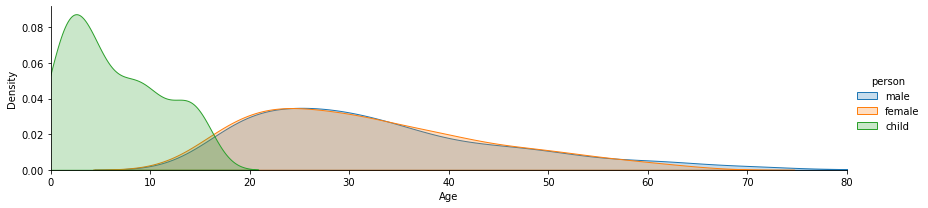

In [23]:
fig = sns.FacetGrid(titanic_df,hue='person',aspect=4) 
fig.map(sns.kdeplot,'Age',shade=True) 
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
# This plot is similar to that above, but displays the breakdown of age between gender and children

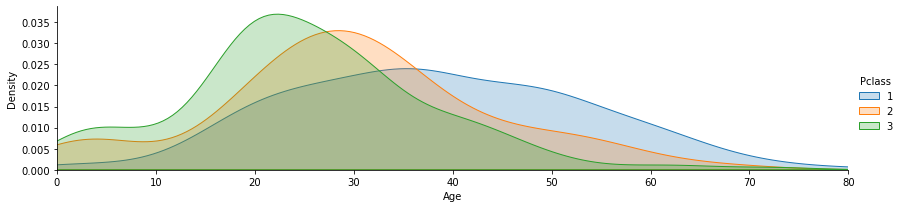

In [24]:
fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4) 
fig.map(sns.kdeplot,'Age',shade=True) 
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
# this plot breaks down the class of the passenger by age

In [25]:
deck = titanic_df['Cabin'].dropna() #Create a variable called deck which drops all NA values from cabin

In [26]:
deck.head() #Displaying the head of the Series

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

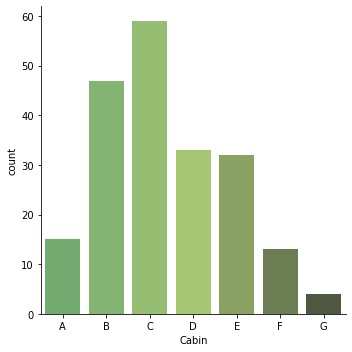

In [28]:
# I create a for loop to iterate over all of the decks and add data into a new column
levels = [] #Create an empty list to insert data into

for level in deck: 
    levels.append(level[0]) #This grabs the first item in the string then appends to the 
                            #level list. .append adds result. This populates the empty list.
cabin_df = DataFrame(levels) #Create a new Dataframe
cabin_df.columns = ['Cabin'] #Create a new column called cabin
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='summer_d',
              order=['A','B','C','D','E','F','G']) 
#Create a catplot using new cabin dataframe

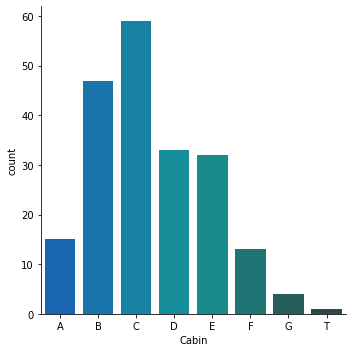

In [32]:
cabin_df['Cabin'].values.sort()
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='winter_d')
#I create a catplot using the new cabin dataframe which values sorted.

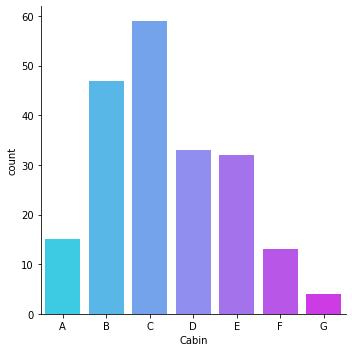

In [26]:
cabin_df=cabin_df[cabin_df.Cabin != 'T'] #Ignore T values as it was a single passanger, hence outlier
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='cool')

Where did the passengers come from?

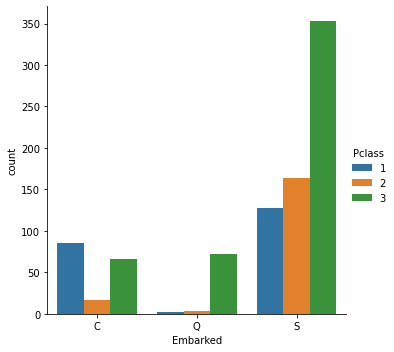

In [33]:
sns.catplot(x='Embarked',kind='count',data=titanic_df,hue='Pclass',
           order = ['C','Q','S'])

## Part 3 - Who was alone and who was with family?

In [34]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [35]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch
# I create a new column called alone by summing sibling and parent child cols to new 'Alone' col.

In [36]:
titanic_df['Alone'] #Inspect new series. If alone = 0 then the passenger had no family aboard.

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [37]:
titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'
# I re-classify the integers in the series. If the integer is not 0, then return 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'
# I do the same with 'Alone' if the passenger had a score of zero.

C:\Users\Andrew\AppData\Local\Temp\ipykernel_14832\1424342948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Alone'].loc[titanic_df['Alone'] >0] = 'With Family'


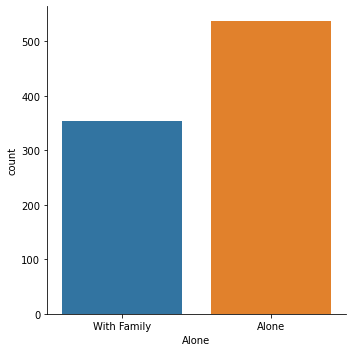

In [38]:
#I plot the new column using a catplot. We can see that more passengers were alone, than with family
sns.catplot(x='Alone',kind='count',data=titanic_df)

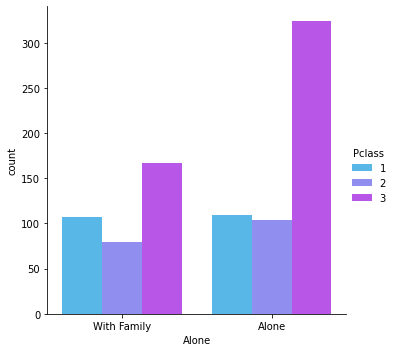

In [39]:
# In this instance, I add a hue of class to further break down who was alone dependent on class 
sns.catplot(x='Alone',kind='count',data=titanic_df,hue='Pclass',
           palette='cool')
# We do see that there are more than double third class passengers travelling alone than with family.
# I am sure we are aware why, as they were travelling to the USA to start a new life.

## Part 4 -  What factors help someone survive the Titanic crash?

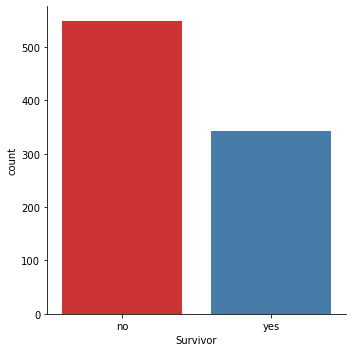

In [40]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})
# I made a new column called survivor. I grabbed info from survived colum. I renamed
                                                 #0 to no and 1 to yes using a dictionary
sns.catplot(x='Survivor',kind='count',data=titanic_df,palette='Set1')

Did class factor in to survival?

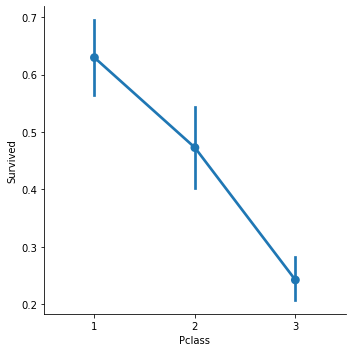

In [41]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=titanic_df)
# It would appear that the survival rates drop with class.

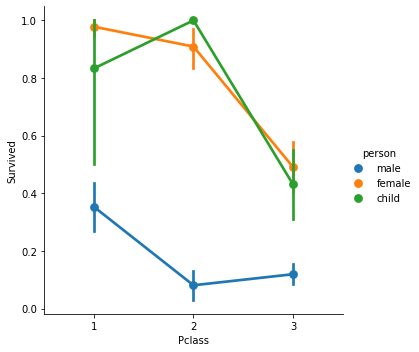

In [42]:
sns.catplot(x='Pclass',y='Survived',kind='point',data=titanic_df,
           hue='person') #this considers class and gender
# Women and children have better survival odds across the board, than males.
# However, third class women and children see a sharp drop in survival compared with first and second class

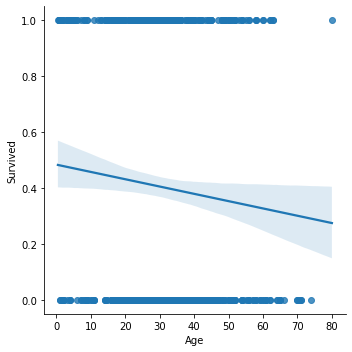

In [43]:
sns.lmplot(x='Age',y='Survived',data=titanic_df)
#The general trend from the lineplot suggests that the older an individual, the higher liklihood they
# did not survive.

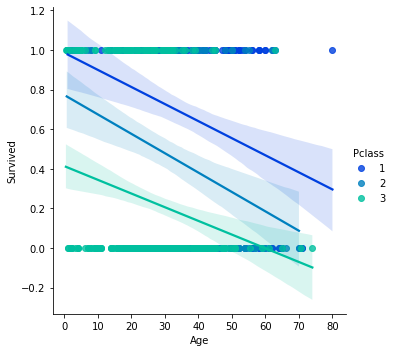

In [44]:
sns.lmplot(x='Age',y='Survived',data=titanic_df, hue='Pclass',
          palette='winter')
# The lineplot here suggests that class does play a role in survival.

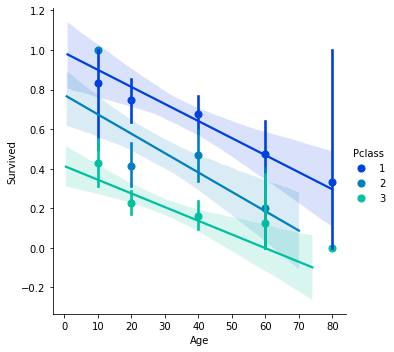

In [42]:
generations = [10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_df,palette='winter',
          x_bins=generations)
# There are very large standard deviation in the older population of first class passengers.

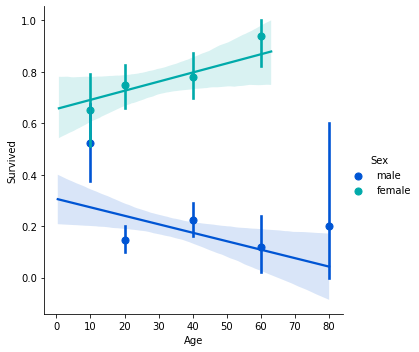

In [43]:
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_df,palette='winter',
          x_bins=generations)
# When the data is broken down between male and female, we see that an older female has a better
# chance of survivng in comparison to an older male. However, the older male does have a much larger
# standard deviation.

What are the average survival rates per class?

In [44]:
titanic_df['Survived'].loc[titanic_df['Pclass']==1].mean()
#for column survived in df locate class =1 and retrieve the mean

0.6296296296296297

In [45]:
titanic_df['Survived'].loc[titanic_df['Pclass']==2].mean()

0.47282608695652173

In [46]:
titanic_df['Survived'].loc[titanic_df['Pclass']==3].mean()

0.24236252545824846

The results above demonstrate that the mean survival drops with class.

Two final questions. 1. Did the deck have an effect on the passenger survival rate? 
e.g., did being on A deck increase survival compared to B deck? 2. Did having a family member increase the odds of surviving the crash?

In [45]:
titanic_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [113]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

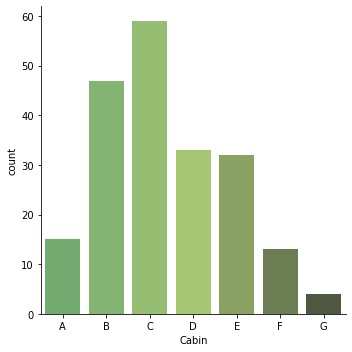

In [46]:
sns.catplot(x='Cabin',kind='count',data=cabin_df,palette='summer_d',
              order=['A','B','C','D','E','F','G']) 

In [47]:
titanic_df['Deck']=cabin_df['Cabin'].str[0] #Create new col with first index (letter) from cabin series

In [48]:
titanic_df['Deck'].describe() #There are only 204 recorded cabin values

count     204
unique      8
top         C
freq       59
Name: Deck, dtype: object

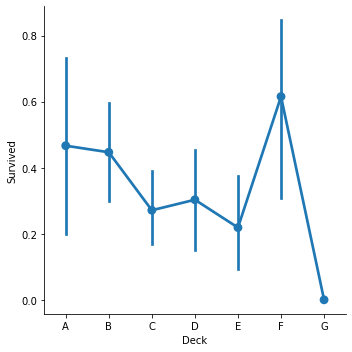

In [51]:
sns.catplot(x='Deck',y='Survived',kind='point', data=titanic_df,
           order=['A','B','C','D','E','F','G']) 
# The data regarding cabins is unreliable as ~700 rows were missing.

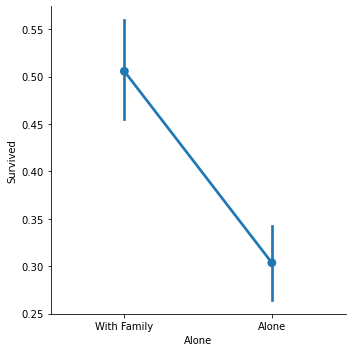

In [50]:
sns.catplot(x='Alone',y='Survived',kind='point',data=titanic_df)
#Having a family increased a passengers chances of survival